In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")
t2_dat=xls_data.loc[:,"# of turns":"HFSS"]
t3_dat=xls_data.loc[:,"# of turns.1":"HFSS.1"]
t4_dat=xls_data.loc[:,"# of turns.2":"HFSS.2"]
t2_dat=t2_dat.replace(np.nan,0)
t3_dat=t3_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [3]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat
t2_dat=data_restore(t2_dat)
t3_dat=data_restore(t3_dat)
t4_dat=data_restore(t4_dat)

In [4]:
total_dat_temp=np.vstack([t2_dat.values,t3_dat.values,t4_dat.values])
del_index=np.where(total_dat_temp[:,6]==0)[0]
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)
total_dat=total_dat_temp.drop(del_index)
total_dat.to_csv("preprocessed_data.csv",
                 columns=total_dat.columns,sep=",", index=False)
data=total_dat.values

In [5]:
log_dat_x=np.log(data[:,:6])
log_dat_y=np.log(data[:,6])
n_data = len(log_dat_y)

In [6]:
x_train = np.hstack( ( np.ones((n_data,1)), log_dat_x, data[:,:6] ) )
#x_train=np.hstack((np.ones((n_data,1)),log_dat_x))
y_train = log_dat_y

/home/jhk/anaconda3/envs/cvx/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(*args, **kw)>

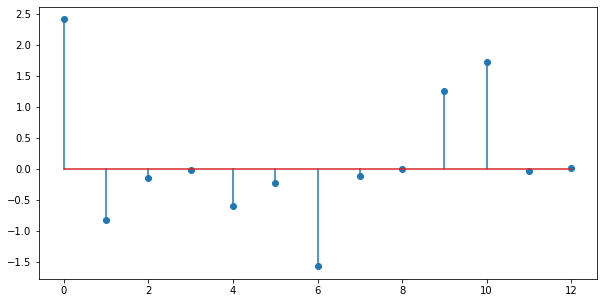

In [7]:
theta_opt = np.linalg.lstsq(x_train,y_train,rcond=None)[0]
plt.figure(figsize=(10,5))
plt.stem(theta_opt)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

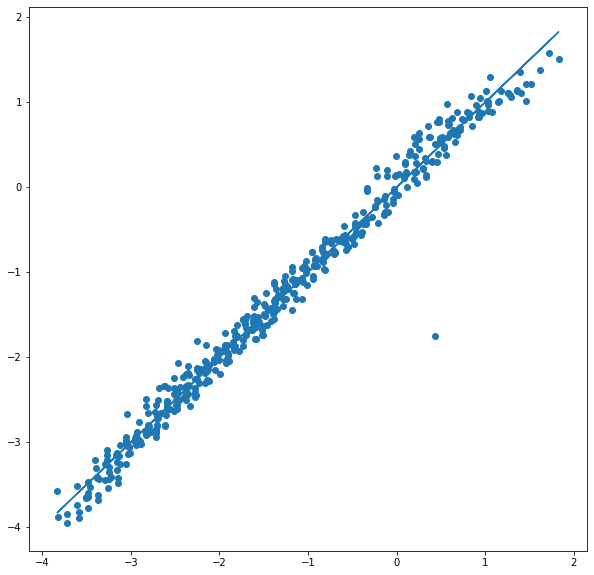

In [8]:
y_pred = x_train.dot(theta_opt)
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_pred)
plt.scatter(y_pred, y_train)
plt.show

In [9]:
mse = np.linalg.norm(y_train - y_pred)**2/n_data
rmse = np.sqrt(mse)
print(mse, rmse)

0.03169255435216809 0.17802402745744209


In [10]:
prediction_error = np.exp(rmse)
print(prediction_error)

1.1948540301942578


In [11]:
 # prediction error: ~19.5%